In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
%matplotlib inline

In [3]:
factors = pd.read_csv('factors.csv')
fit_data = pd.read_csv('fit_data.csv')

In [4]:
factors.head()

,Unnamed: 0,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Estonia,Finland,France,Germany,United Kingdom,Greece,Hungary,Indonesia,Iran,Ireland,Italy,Japan,South Korea,Latvia,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Morocco,Netherlands,New Zealand,Norway,Pakistan,Poland,Portugal,Romania,Russia,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,United States,Uruguay
0,pdi,49,38,11,65,69,39,63,80,67,73,57,18,40,33,68,35,35,60,46,78,58,28,50,54,60,44,42,40,104,56,81,70,38,22,31,55,68,63,90,93,86,104,71,57,31,34,58,64,66,40,61
1,idv,46,90,55,75,38,80,23,20,13,33,58,74,60,63,71,67,89,35,80,14,41,70,76,46,18,70,60,60,26,59,30,46,80,79,69,14,60,27,30,39,25,52,27,51,71,68,17,20,37,91,36
2,mas,56,61,79,54,49,52,28,66,64,40,57,16,30,26,43,66,66,57,88,46,43,68,70,95,39,9,19,50,50,47,69,53,14,58,8,50,64,31,42,36,43,110,19,42,5,70,45,34,45,62,38
3,uai,86,51,70,94,76,48,86,30,80,80,74,23,60,59,86,65,35,112,82,48,59,35,75,92,85,63,65,70,36,96,82,68,53,49,50,70,93,104,90,95,92,51,88,86,29,58,69,64,85,46,100
4,ltowvs,20,21,60,82,44,36,31,87,13,58,70,35,82,38,63,83,51,45,58,62,14,24,61,88,100,69,82,64,41,47,24,14,67,33,35,50,38,28,52,81,52,77,49,48,53,74,93,32,46,26,26


In [5]:
# from worldometers.info
population = ['population', 45195774, 25499884, 9006398, 11589623, 212559417, 37742145, 19116201, 1439323776, 50882891, 4105267, 10708981, 5792202, 1326535, 5540720, 65273511, 83783942, 67886011, 10423054, 9660351, 273523615, 83992949, 4937786, 60461826, 126476461, 51269185, 1886198, 2722289, 625978, 32365999, 441543, 128932753, 36910560, 17134872, 4822233, 5421241, 220892340, 37846611, 10196709, 19237691, 145934462, 8737371, 5459642, 2078938, 46754778, 10099265, 8654622, 23816775, 69799978, 84339067, 331002651, 3473730]
population = pd.DataFrame(population).transpose()
population.columns = factors.columns
population.index = [5]

In [6]:
frames = [factors, population, fit_data]
all_data = pd.concat(frames, sort=True)
all_data.index = all_data['Unnamed: 0']
all_data = all_data.drop('Unnamed: 0', axis=1)
del all_data.index.name
all_data = all_data.transpose()
all_data['b/g'] = all_data['b']/all_data['g']
all_data['norm cases'] = all_data['proj cases']/all_data['population']

In [7]:
for col in all_data.columns:
    max_stat = all_data[col].max()
    min_stat = all_data[col].min()
    
    f = lambda x: (x-min_stat)/(max_stat-min_stat)
    all_data[col] = all_data[col].apply(f)

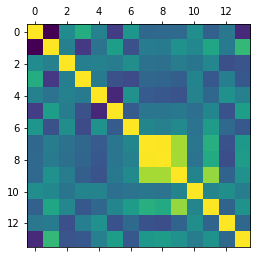

In [8]:
plt.matshow(all_data.corr())
plt.show()

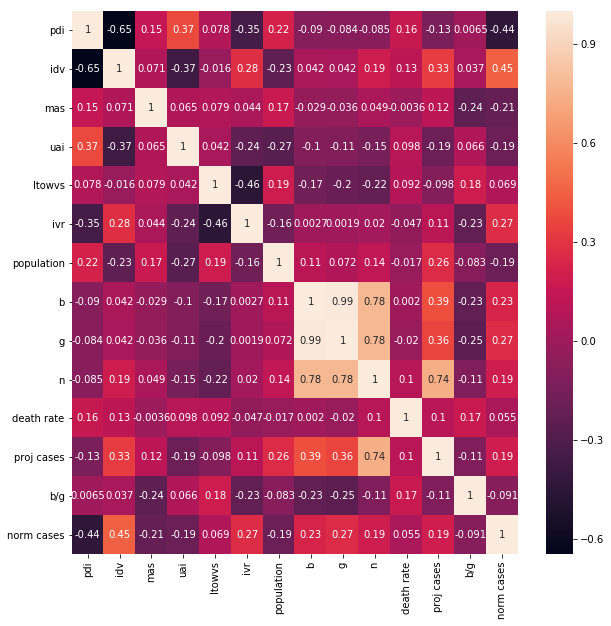

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(all_data.corr(), annot = True)

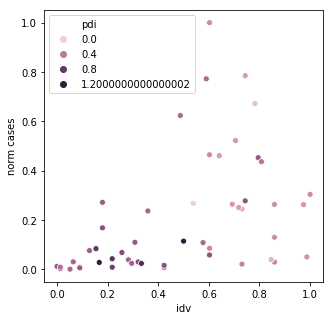

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = all_data, hue = 'pdi', x = 'idv', y = 'norm cases')

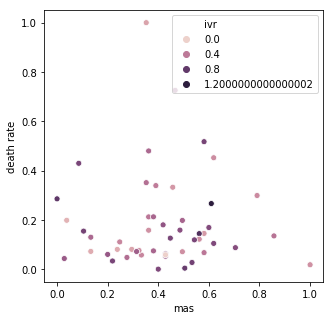

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = all_data, hue = 'ivr', x = 'mas', y = 'death rate')

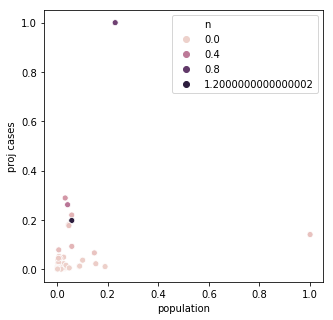

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = all_data, hue = 'n', x = 'population', y = 'proj cases')